In [1]:
# Load libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
...

Ellipsis

## Supervised Learning

### Load the dataset

In [2]:
# Load dataset
cancer = read_csv("Breast_cancer_data.csv")
cancer.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


### Summarizing the data

In [3]:
cancer.info() #check if there is missing data
print(cancer.shape) #get the shape of the dataset
print(cancer.describe()) #statistical description of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
(569, 6)
       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.7

## Visualization

#####   The scatter plot below looks at the relationshp that the columns have which each other and diagnosis

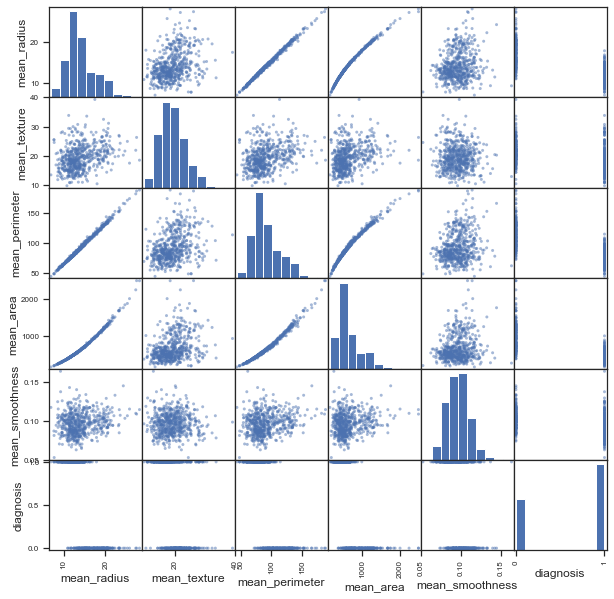

In [14]:
# scatter plot matrix
import matplotlib.pyplot as plt 
scatter_matrix(cancer)
#plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Diagnosis '0' means  breast cancer and diagnosis '1' means no breast cancer

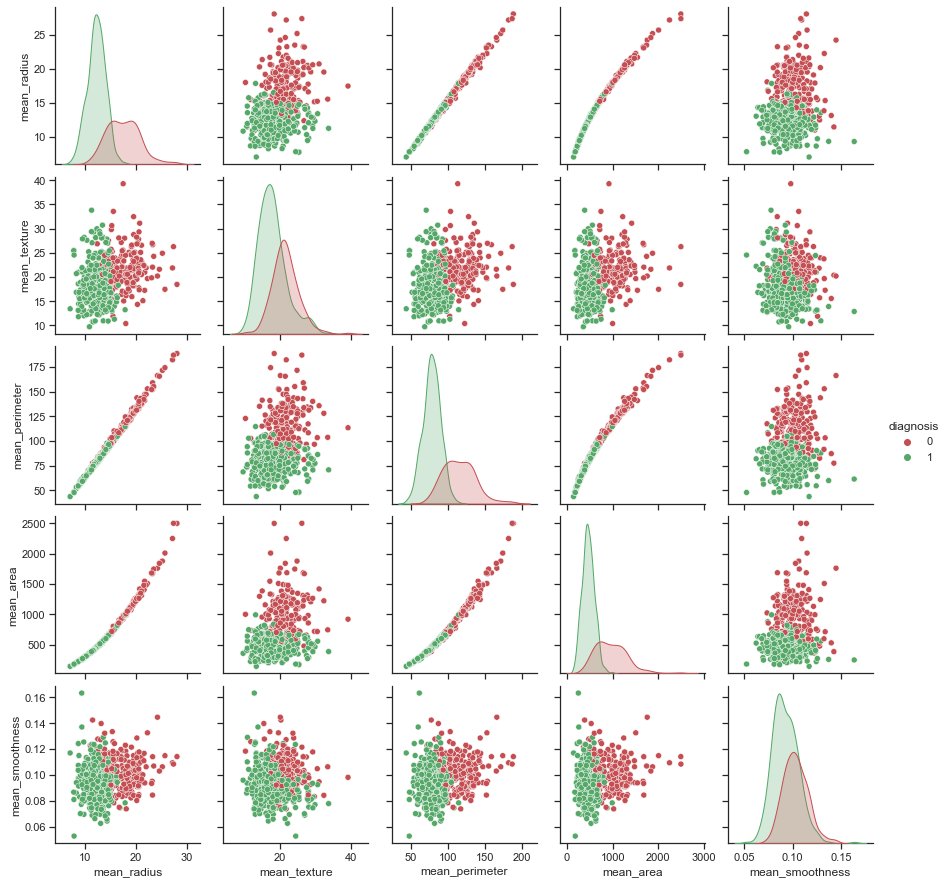

In [5]:
# pair plot of sample feature
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(cancer, palette = ('r','g'), hue="diagnosis")
plt. show()

<AxesSubplot:>

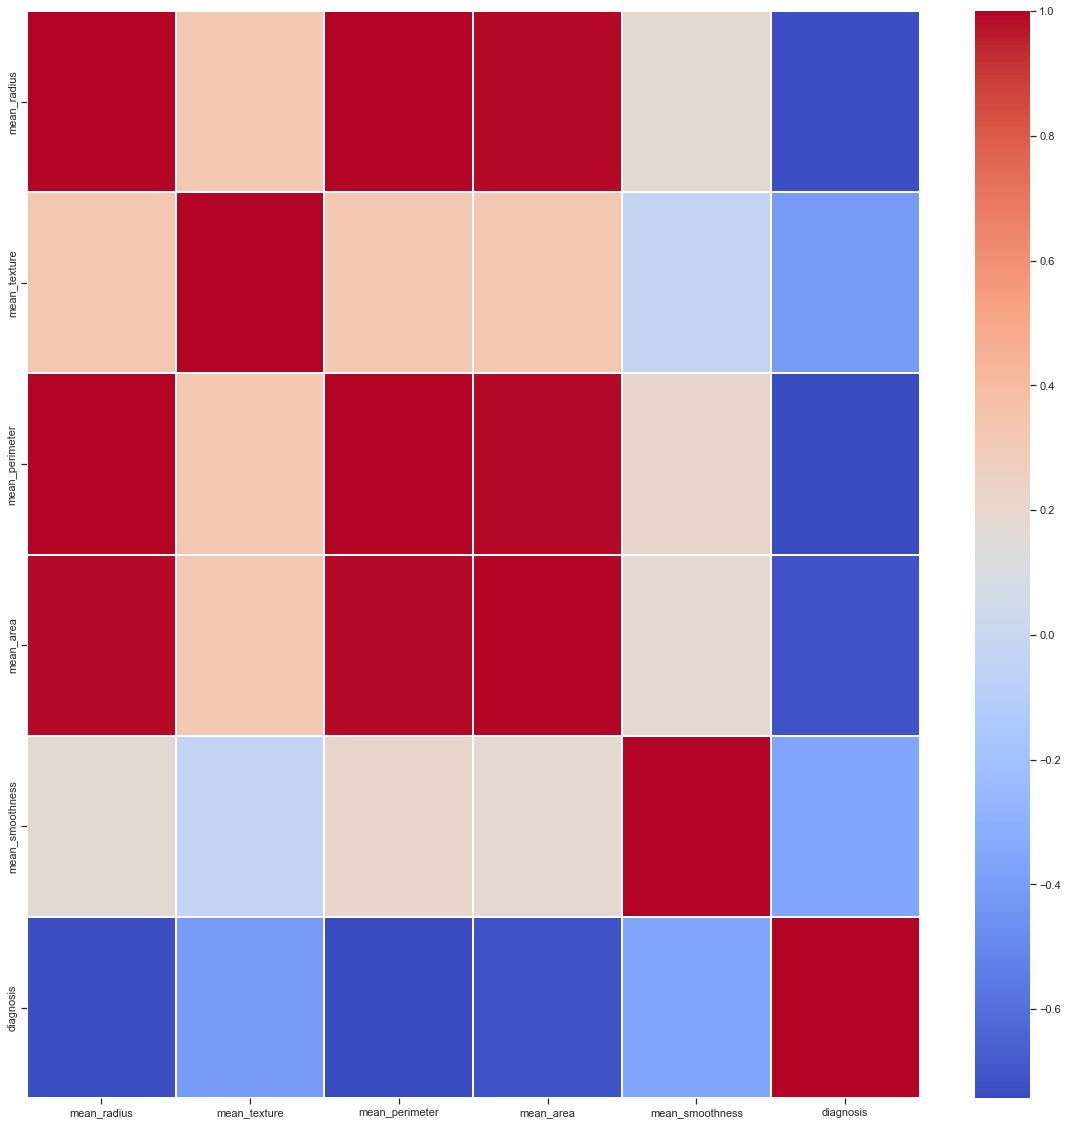

In [6]:
# Heatmap of Correlation matrix of cancer dataframe
plt.figure(figsize=(20,20))
sns.heatmap(cancer.corr(),  cmap ='coolwarm', linewidths=2)

/Users/lanellephillips/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

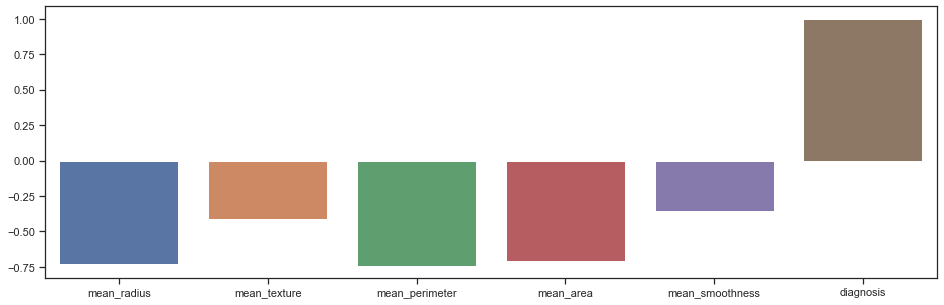

In [7]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
sns.barplot(cancer.corrwith(cancer.diagnosis).index, cancer.corrwith(cancer.diagnosis))

/Users/lanellephillips/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lanellephillips/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lanellephillips/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

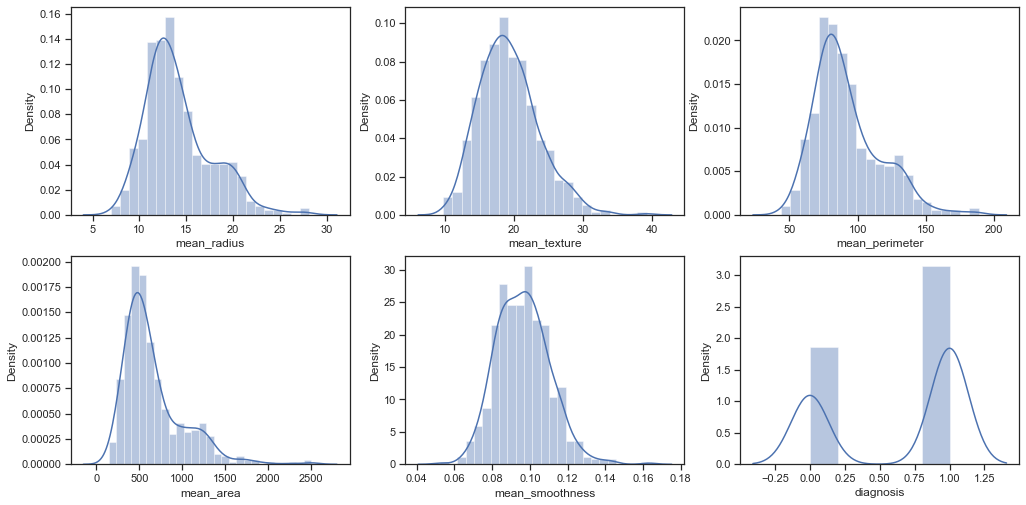

In [8]:
#plot density
plt.figure(figsize=(17, 13))
col = 1
for i in cancer.columns:
    plt.subplot(3, 3, col)
    sns.distplot(cancer[i], color = 'b')
    col += 1 

###### mean_texture and mean_smoothness seem to correlate with diagnosis the most

### Data preprocessing

#### Splitting the data

In [29]:
#Assigning and dividing the dataset
X = cancer.drop('diagnosis',axis=1) #mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness columns
y=cancer['diagnosis']
X.head(5)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [24]:
# split data into 80% training data, 20% test data, data is shuffled before applying split
trainx, testx, trainy, testy = train_test_split(X, y, train_size = 0.2, random_state = 0)

# normalize the data--standarize data using Standard Scaler 
scaler = StandardScaler()

# fit on training fetures only
scaler.fit(trainx)

# apply transform to both the training set and the test features
trainx = scaler.transform(trainx)
testx = scaler.transform(testx)


### Machine Learning Algorithms

#### Binary Classfication using k nearest Neighbor

Applying the model to mean_texture and smoothness

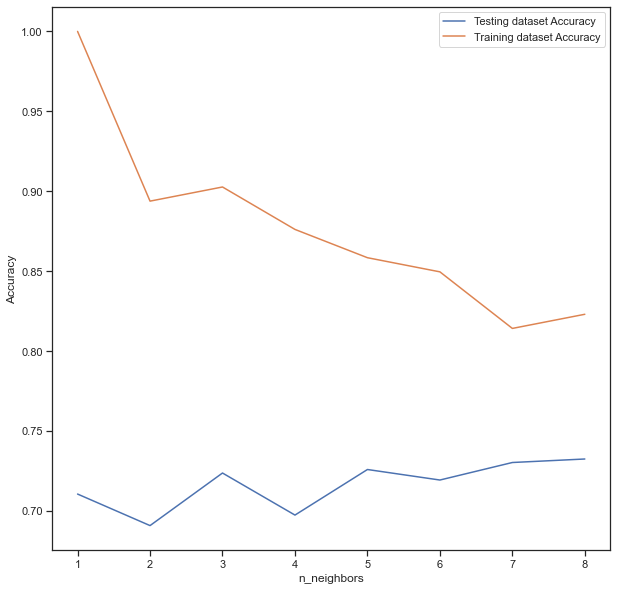

In [35]:
X1=cancer[['mean_texture', 'mean_smoothness']]
y1=cancer['diagnosis']
X1.head(5)

# split data into 80% training data, 20% test data, data is shuffled before applying split
trainx1, testx1, trainy1, testy1 = train_test_split(X1, y1, train_size = 0.2, random_state = 0)

# normalize the data--standarize data using Standard Scaler 
scaler = StandardScaler()

# fit on training fetures only
scaler.fit(trainx1)

# apply transform to both the training set and the test features
trainx1 = scaler.transform(trainx1)
testx1 = scaler.transform(testx1)

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainx1, trainy1)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(trainx1, trainy1)
    test_accuracy[i] = knn.score(testx1, testy1)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


Appling the model to mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness

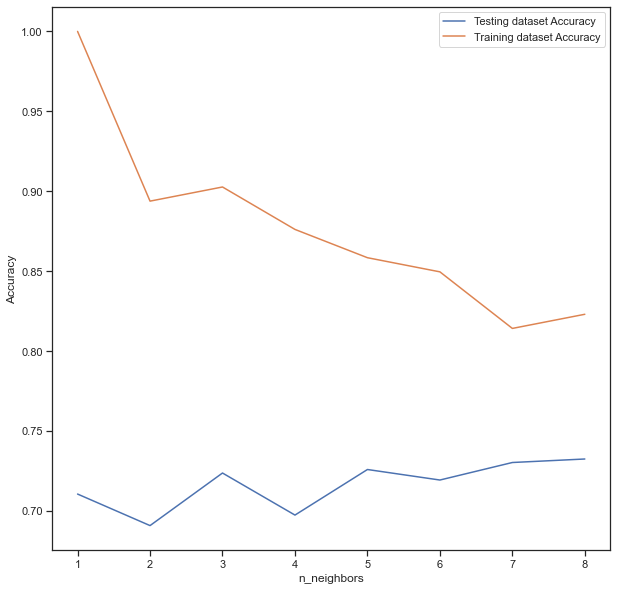

In [30]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainx, trainy)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(trainx, trainy)
    test_accuracy[i] = knn.score(testx, testy)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


#### Naive Bayes Classification

Appling the model to mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness

In [25]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(trainx, trainy)

#Predict the response for test dataset
y_pred = gnb.predict(testx)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testy, y_pred))

Accuracy: 0.8925438596491229


Applying the model to only mean texture and smoothness

In [36]:
X1=cancer[['mean_texture', 'mean_smoothness']]
y1=cancer['diagnosis']
X1.head(5)

# split data into 80% training data, 20% test data, data is shuffled before applying split
trainx1, testx1, trainy1, testy1 = train_test_split(X1, y1, train_size = 0.2, random_state = 0)

# normalize the data--standarize data using Standard Scaler 
scaler = StandardScaler()

# fit on training fetures only
scaler.fit(trainx1)

# apply transform to both the training set and the test features
trainx1 = scaler.transform(trainx1)
testx1 = scaler.transform(testx1)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(trainx1, trainy1)

#Predict the response for test dataset
y_pred1 = gnb.predict(testx1)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testy1, y_pred1))

Accuracy: 0.756578947368421


Mean texture and mean smoothness only predicts diagnosis with a 75% accuracy, compared to using all the columns in conjunction which has an 89% accuracy

#### Linear Regression 

In [37]:
import math
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(trainx, trainy)
ytrain_pred = lr.predict(trainx)
ytest_pred = lr.predict(testx)

from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(trainy, ytrain_pred)
lr_train_r2 = r2_score(trainy, ytrain_pred)
lr_test_mse = mean_squared_error(testy, ytest_pred)
lr_test_r2 = r2_score(testy, ytest_pred)
lr_test_r = math.sqrt(lr_test_r2)


lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2, lr_test_r]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2', 'Test R']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2,Test R
0,Linear regression,0.156574,0.335782,0.165085,0.29227,0.54062


In [ ]:
Our R value of 54% shows that mean_texture, mean_smoothness, mean_perimeter, mean_area has a moderate positive correlation with diagnosis.

### Analysis and takeaways

In the project, I try to figure out which features( mean smoothness, perimeter, area, texture and radius) have the greatest correlation with a breast cancer diagnosis. 
I try to predict breast cancer based on these features.
First, I load the dataset and summarize the data to check for missing values.
Then I visualize the correlation of our features with our target, diagnosis.
By obverving the first visual, we see that as mean radius, mean perimeter, and mean area increase, there is a greater liklihood of a breast cancer diagnosis.
We also see that mean texture and mean smoothness have the greatest correlation with diagnosis.
Next, we pre-process our data and apply machine learning algorithms to it. 
I got a lower accruacy for almost every model when I only used mean texture and mean diagnosis as my features.
So, I decided to use all the columns except for diagnosis as my features for greater accuracy.

By taking the mean_radius, mean_texture, mean_perimeter, mean_area, and mean_smoothness the Naive Bayes classifiation model predicted breast cancer with a 89% accuracy.
By taking the mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness, the Binary Classification model predicted breast cancer with a an 84% - 89% accuracy.

My major takeway is that mean_radius, mean_texture, mean_perimeter, mean_area, and mean_smoothness can predict breast cancer with a high percent of accuracy.
The larger these values are, the more likely someone is going to be diagnosed with breast cancer.

Sources:

https://indianaiproduction.com/breast-cancer-detection-using-machine-learning-classifier/
https://nbviewer.org/github/shoaib555/Unsupervised-Learning/blob/main/uscar.ipynb

https://towardsdatascience.com/how-to-build-your-first-machine-learning-model-in-python-e70fd1907cdd

https://towardsdatascience.com/unsupervised-learning-project-creating-customer-segments-17c4b4bbf925